<a href="https://colab.research.google.com/github/iljimae13/EksplorasiHyperparameterCNNdanNeuralNetwork./blob/main/TugasKlasifikasiCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mendefinisikan library yang dibutuhkan dalam proses klasifikasi menggunakan Tensorflow Keras

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import dataset di Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset yang digunakan menggunakan Digit Recognizer dari kaggle

In [4]:
train = pd.read_csv("/content/drive/MyDrive/Program/Digit/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Program/Digit/test.csv")

In [5]:
print(train.shape)
print(train.info())
train.head()

(42000, 785)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(test.shape)
print(test.info())
test.head()

(28000, 784)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
None


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y_train = train["label"]

# menghilangkan "label" columns
x_train = train.drop(labels=["label"], axis = 1)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

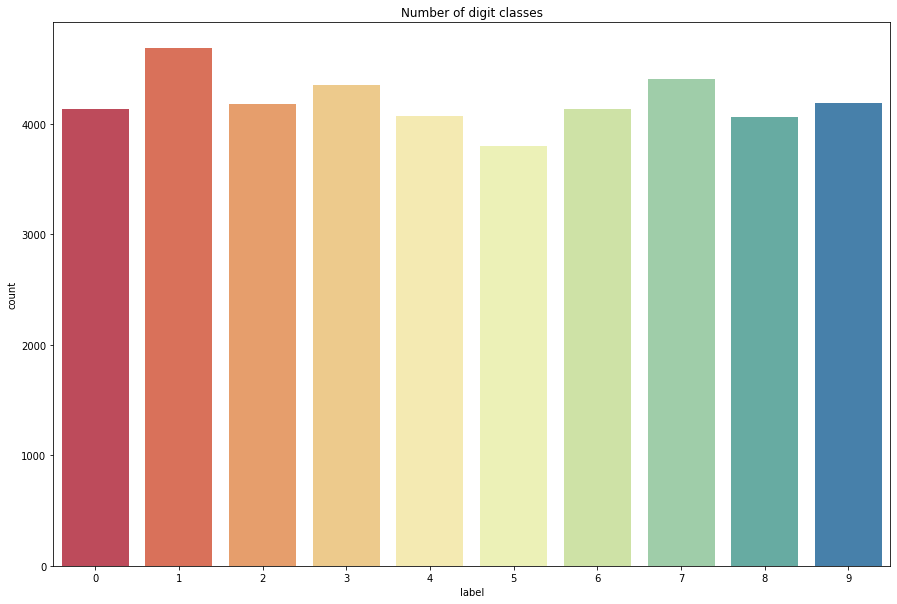

In [8]:
plt.figure(figsize=(15,10))
g = sns.countplot(y_train, palette='Spectral')
plt.title("Number of digit classes")
y_train.value_counts()

In [9]:
#standarisasi dengan dibagi oleh 255
x_train = x_train / 255.0 
test = test / 255.0
print("x_train shape", x_train.shape)
print("test shape", test.shape)

x_train shape (42000, 784)
test shape (28000, 784)


In [10]:
# Ubah dimensi ke format input model CNN  
x_train = x_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)
print("x_train shape", x_train.shape)
print("test shape", test.shape)

x_train shape (42000, 28, 28, 1)
test shape (28000, 28, 28, 1)


In [11]:
# Label Encoding 
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, num_classes = 10)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x_train, 
                                                  y_train, 
                                                  test_size = 0.1, 
                                                  random_state = 5)

In [13]:
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


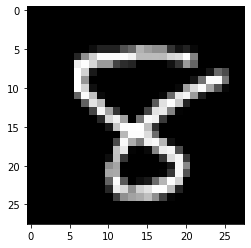

In [14]:
plt.imshow(X_train[1][:,:,0],cmap='gray')
plt.show()

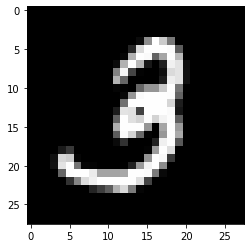

In [15]:
plt.imshow(X_train[0][:,:,0],cmap='gray')
plt.show()

In [16]:
import os
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [17]:
model = Sequential()

# 3.1 Conv2D layer
model.add(Conv2D(filters = 8, 
                 kernel_size = (5,5),
                 padding = 'Same', 
                 activation ='relu', 
                 input_shape = (28,28,1)))

In [18]:
# 3.2 Maxpool2d layer
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [19]:
# 3.3 convolutional layer kedua
model.add(Conv2D(filters = 16, 
                 kernel_size = (3,3),
                 padding = 'Same', 
                 activation ='relu'))

In [20]:
# 3.4 Pooling Layer kedua
model.add(MaxPool2D(pool_size=(2,2), 
                    strides=(2,2)))
model.add(Dropout(0.25))

In [21]:
# 3.3 convolutional layer ketiga
model.add(Conv2D(filters = 16, 
                 kernel_size = (3,3),
                 padding = 'Same', 
                 activation ='relu'))

In [22]:
# 3.5 Flatten
model.add(Flatten())

In [23]:
# 3.6 fully connected
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 16)          0

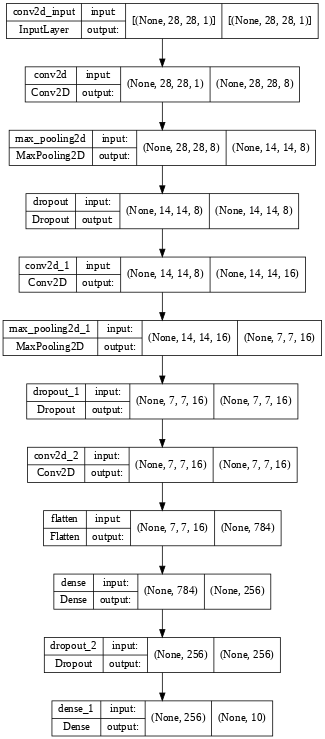

In [25]:
model_viz = tf.keras.utils.plot_model(model,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_viz

In [26]:
# mendefisikan optimizer
optimizer = Adam(lr = 0.001,
                beta_1 = 0.9,
                beta_2 = 0.999)

In [27]:
# data augmentation
# membuat generator

datagen = ImageDataGenerator(
        featurewise_center = False,  # setel input mean ke 0 di atas dataset
        samplewise_center = False,  # atur rata-rata setiap sampel ke 0
        featurewise_std_normalization = False,  # membagi input dengan std dari dataset
        samplewise_std_normalization = False,  # bagi setiap input dengan stdnya
        zca_whitening = False,  # pengurangan dimensi
        rotation_range = 15,  # memutar gambar secara acak dalam kisaran 5 derajat
        zoom_range = 0.01, # Zoom gambar secara acak 10%
        width_shift_range = 0.1,  # menggeser gambar secara acak secara horizontal 10%
        height_shift_range = 0.1,  # menggeser gambar secara acak secara vertikal 10%
        horizontal_flip = False,  # membalik gambar secara acak
        vertical_flip = False)  # membalik gambar secara acak

datagen.fit(X_train)

In [28]:
# membuat dan menyusun model
model.compile(optimizer = optimizer, 
              loss = "categorical_crossentropy", 
              metrics=["accuracy"])

# untuk hasil yang lebih baik, tingkatkan epochs
epochs = 100
batch_size = 250


# training
history = model.fit_generator(datagen.flow(X_train,
                                           Y_train, 
                                           batch_size = batch_size),
                              epochs = epochs, 
                              validation_data = (X_val,Y_val), 
                              validation_steps = X_val.shape[0] // batch_size)

Epoch 1/100
152/152 [==============================] - 31s 199ms/step - loss: 1.1670 - accuracy: 0.6002 - val_loss: 0.2550 - val_accuracy: 0.9305
Epoch 2/100
152/152 [==============================] - 29s 189ms/step - loss: 0.4792 - accuracy: 0.8438 - val_loss: 0.1348 - val_accuracy: 0.9619
Epoch 3/100
152/152 [==============================] - 30s 199ms/step - loss: 0.3394 - accuracy: 0.8910 - val_loss: 0.1029 - val_accuracy: 0.9707
Epoch 4/100
152/152 [==============================] - 29s 189ms/step - loss: 0.2870 - accuracy: 0.9094 - val_loss: 0.0852 - val_accuracy: 0.9750
Epoch 5/100
152/152 [==============================] - 29s 188ms/step - loss: 0.2437 - accuracy: 0.9237 - val_loss: 0.0740 - val_accuracy: 0.9767
Epoch 6/100
152/152 [==============================] - 29s 188ms/step - loss: 0.2204 - accuracy: 0.9317 - val_loss: 0.0669 - val_accuracy: 0.9786
Epoch 7/100
152/152 [==============================] - 29s 189ms/step - loss: 0.2037 - accuracy: 0.9373 - val_loss: 0.0633 -

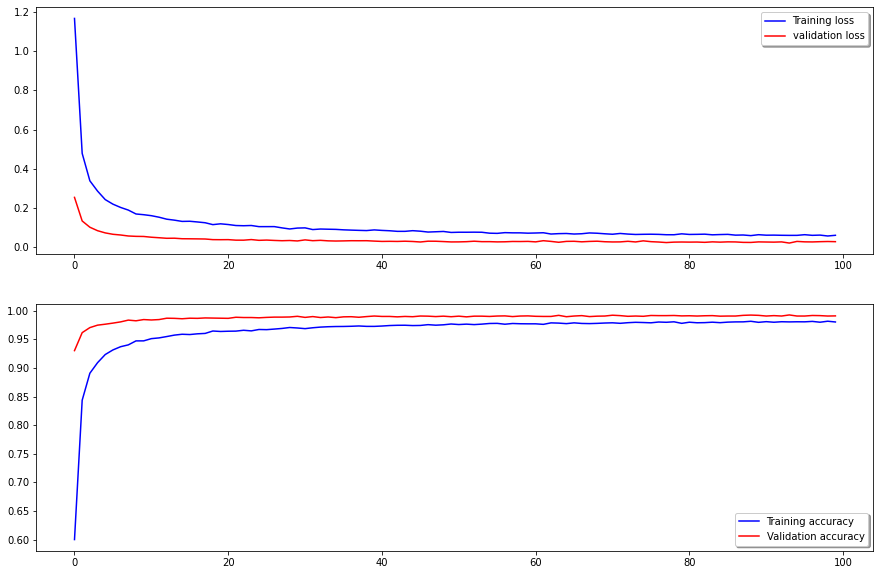

In [29]:
# plot 1: Loss
fig, ax = plt.subplots(2,1, figsize=(15, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

# plot 2: accuracy
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [30]:
history.history['loss']

[1.167003870010376,
 0.4791601002216339,
 0.3394384980201721,
 0.2870262563228607,
 0.24371646344661713,
 0.2204466313123703,
 0.20370367169380188,
 0.19031834602355957,
 0.17042741179466248,
 0.1667209416627884,
 0.16171057522296906,
 0.15393105149269104,
 0.14385153353214264,
 0.1389196515083313,
 0.1325538605451584,
 0.13325762748718262,
 0.12969820201396942,
 0.12571516633033752,
 0.1161193922162056,
 0.12026696652173996,
 0.11665043979883194,
 0.11157539486885071,
 0.11048296093940735,
 0.11170317232608795,
 0.10587579756975174,
 0.10592576861381531,
 0.10602486878633499,
 0.09954722970724106,
 0.09398472309112549,
 0.09856615215539932,
 0.09959819912910461,
 0.09097842872142792,
 0.09369128942489624,
 0.09274483472108841,
 0.09192780405282974,
 0.08960093557834625,
 0.0881534069776535,
 0.08689974248409271,
 0.08584606647491455,
 0.08920573443174362,
 0.08670368790626526,
 0.08490950614213943,
 0.08192963153123856,
 0.08192217350006104,
 0.08529328554868698,
 0.08265333622694016,

In [31]:
history.history['accuracy']

[0.6002116203308105,
 0.8438095450401306,
 0.8909524083137512,
 0.9093915224075317,
 0.9236508011817932,
 0.9316931366920471,
 0.937328040599823,
 0.9405291080474854,
 0.9474867582321167,
 0.9475396871566772,
 0.9514285922050476,
 0.9527248740196228,
 0.9550793766975403,
 0.9575926065444946,
 0.9591005444526672,
 0.9585978984832764,
 0.9598677158355713,
 0.9605555534362793,
 0.9647619128227234,
 0.9639682769775391,
 0.9643915295600891,
 0.9645767211914062,
 0.9660581946372986,
 0.9649999737739563,
 0.9674338698387146,
 0.9671428799629211,
 0.9681481719017029,
 0.9692592620849609,
 0.9708994626998901,
 0.9700528979301453,
 0.9689153432846069,
 0.9704497456550598,
 0.9715873003005981,
 0.9722486734390259,
 0.9726190567016602,
 0.9727248549461365,
 0.9730423092842102,
 0.9735714197158813,
 0.9728835821151733,
 0.9728571176528931,
 0.973465621471405,
 0.9743386507034302,
 0.9747619032859802,
 0.974841296672821,
 0.9742857217788696,
 0.974497377872467,
 0.9758729934692383,
 0.97494709491729

In [32]:
model.evaluate(x_train, y_train, verbose=2)

1313/1313 - 14s - loss: 0.0163 - accuracy: 0.9945 - 14s/epoch - 10ms/step


[0.016264379024505615, 0.9944761991500854]

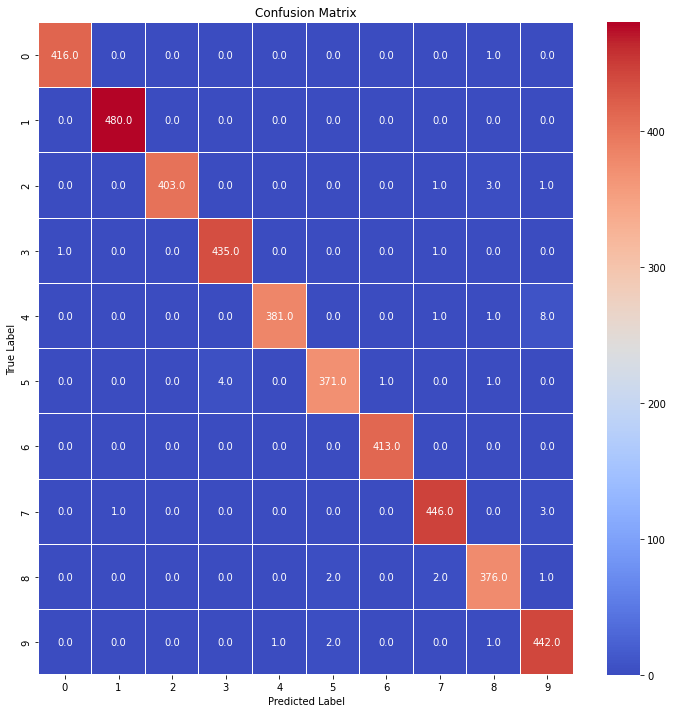

In [33]:
# confusion matrix
import seaborn as sns
# Memprediksi nilai dari dataset validasi
Y_pred = model.predict(X_val)

# Ubah kelas prediksi menjadi satu vektor panas
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

# Ubah pengamatan validasi menjadi satu vektor panas
Y_true = np.argmax(Y_val,axis = 1) 

# menghitung matriks kebingungan
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

# plot matriks kebingungan
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_mtx, annot=True, 
            linewidths=0.01,cmap="coolwarm",
            linecolor="white", 
            fmt= '.1f',ax=ax)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

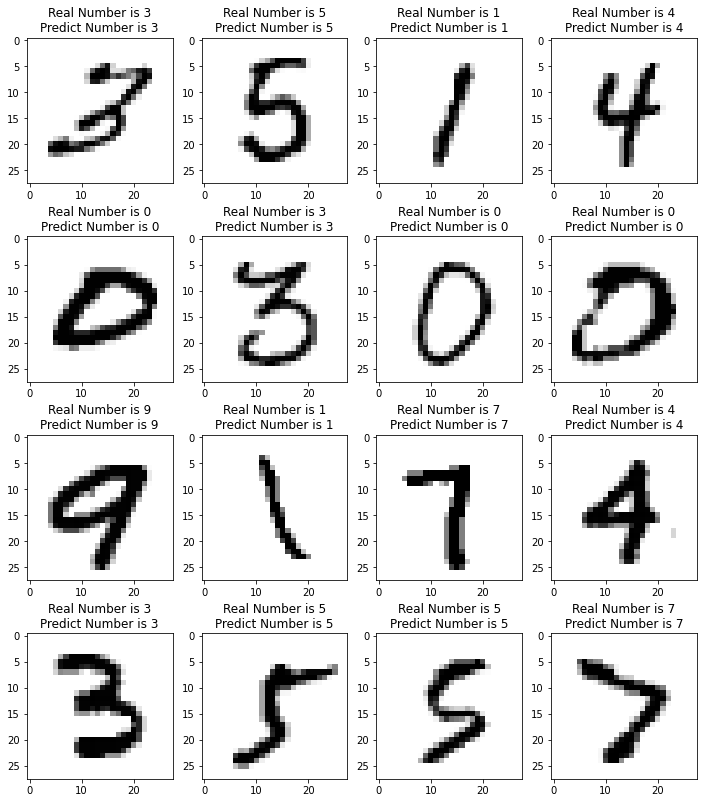

In [34]:
y_pred = model.predict(X_val)
X_test__ = X_val.reshape(X_val.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {Y_val[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

In [35]:
test.shape

(28000, 28, 28, 1)

In [36]:
results = model.predict(test)
results = np.argmax(results,axis = 1)
submission = pd.read_csv('/content/drive/MyDrive/Program/Digit/sample_submission.csv')

In [37]:
submission['Label'] = results
submission.to_csv('submission.csv', header=True, index=False)